# Final Project Template

For your final project, you are required to create an object detection and classification pipeline using the provided datasets. You will train a classification model using the included images and then apply this model for inference on the provided still image.

Here are the detailed steps for your project:

1) Begin by implementing one of the classic object detection techniques we have covered, such as HSV tracking, blob detection, edge detection. You can choose to employ one technique or combine multiple ones. The goal is to create bounding boxes around objects within the scene. To facilitate the classification step, ensure that all bounding boxes are in the form of rectangles.&nbsp;

2) Utilize the provided images to train a Convolutional Neural Network (CNN) model for the classification of the objects within the bounding boxes. You can use Google Colab to train larger models that require a GPU. We will discuss the specifics of this process in class.&nbsp;

3) Finally, render the final still image with bounding boxes and text that display the classification label of the object contained within each box.

We will build and discuss small examples of each step in this project to help you successfully complete it.

Submit a notebook with your all your model training and object detection steps.&nbsp; Also include your model in ".keras" or ".tf" format.

The datasets (choose one, you don't have to do both!):

1) Car/Truck/Airplane

2) Dog/Bird/Deer



Notes:

1) You are creating a small model which can classify small images.&nbsp; &nbsp;Follow the basic structure and format we discussed in class.&nbsp;

2) Your models will not be perfect, averaging around 75% accuracy,&nbsp; and mislabeling will happen.&nbsp; Concentrate on your object detection pipeline to create bounding boxes and then passing the image data to your model for classification.&nbsp;

3) Make sure your bounding boxes are sized correctly for your model.

4) If you normalize your image data (0-1) then you need to normalize the images from your bounding boxes before you pass them to your model.

5) Your models will be trained with labels as integer values and will need to be mapped to your class names.&nbsp; "Deer", "Dog" ... etc.&nbsp;&nbsp;

In [24]:

import tensorflow as tf

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))



Num GPUs Available:  1


## Model Training

In [25]:
# Code for your model goes here
# i manually unzipped files into train folder

#import libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os


In [26]:
# Load the images from the directory
def load_images_from_folder(train):
    images = []
    for filename in os.listdir(train):
        img = cv2.imread(os.path.join(train, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            images.append(img)
    return images

# The folder paths your images are located in.  You will change these for your directories.
folder_paths = ['train/dog', 'train/bird', 'train/deer']


# The class names/labels of your images.
class_labels = {'dog': 0, 'bird': 1, 'deer': 2}

# The lists to store your images and labels in.
x_train = []
y_train = []

# Load the images and labels into the lists.
for folder_path in folder_paths:
    class_name = os.path.basename(folder_path)
    class_id = class_labels[class_name]
    images = load_images_from_folder(folder_path)

    # Extend the lists to add the images and labels from the loaded folder.
    x_train.extend(images)
    y_train.extend([class_id] * len(images))

# Convert the loaded lists into numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

In [27]:
# Print the shape of the training data
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Print the first 10 labels
print(f"Sample labels: {y_train[:10]}")

x_train shape: (15000, 64, 64, 3)
y_train shape: (15000,)
Sample labels: [0 0 0 0 0 0 0 0 0 0]


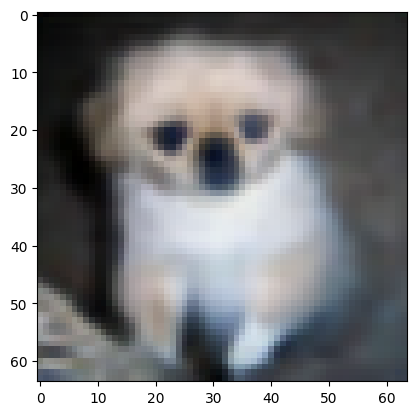

In [28]:
plt.imshow(x_train[0])

In [29]:
# Check the corresponding label for the image above. Change the index to view different labels.
#prints out 0 which means dog. we're good.
print(y_train[0])

0


In [30]:
print(x_train[0])

[[[  7   4   3]
  [  2   2   4]
  [  8   6   7]
  ...
  [ 38  37  38]
  [ 32  36  35]
  [ 30  38  34]]

 [[  3   8   9]
  [ 10  11   9]
  [ 12  14   9]
  ...
  [ 39  41  40]
  [ 35  36  36]
  [ 34  33  33]]

 [[  4   7   5]
  [  9  10   9]
  [  7  10   9]
  ...
  [ 40  41  41]
  [ 38  40  40]
  [ 37  37  38]]

 ...

 [[136 140 141]
  [144 149 150]
  [152 155 155]
  ...
  [ 63  69  77]
  [ 60  68  77]
  [ 59  66  74]]

 [[ 84  91 106]
  [ 79  89 108]
  [ 86  96 116]
  ...
  [ 60  67  77]
  [ 54  63  78]
  [ 55  64  75]]

 [[ 77  88 108]
  [ 70  81 102]
  [ 76  86 105]
  ...
  [ 61  68  78]
  [ 56  64  75]
  [ 57  64  77]]]


In [31]:
x_train = x_train.astype('float32') / 255.0

In [32]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Num GPUs Available:  1
Default GPU Device: /device:GPU:0


2023-12-10 02:21:59.819172: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-10 02:21:59.819391: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-10 02:21:59.819560: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [33]:
# Let's build out model.

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# import to_categorical from tensorflow
from tensorflow.keras.utils import to_categorical
# save each epoch of the model
from keras.callbacks import ModelCheckpoint

# Define the checkpoint callback
checkpoint_path = "best_model.tf"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)

# Normalize the images to pixel values (0, 1)
# keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32,32,3)),

# Add data augmentation here
keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(64,64,3)),
keras.layers.experimental.preprocessing.RandomRotation(0.1),
keras.layers.experimental.preprocessing.RandomZoom(0.1),

# Define the VGG16 architecture
model = keras.Sequential([
    # Block 1
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64,64,3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 2
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 3
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 4
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 5
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Fully connected layers
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=100,  batch_size=32, shuffle=True, validation_split=0.1, callbacks=[checkpoint])

Epoch 1/100
422/422 [==============================] - ETA: 0s - loss: 1.0873 - accuracy: 0.3767
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


422/422 [==============================] - 22s 48ms/step - loss: 1.0873 - accuracy: 0.3767 - val_loss: 1.3198 - val_accuracy: 0.0000e+00
Epoch 2/100
421/422 [============================>.] - ETA: 0s - loss: 1.0831 - accuracy: 0.4001
Epoch 2: val_accuracy did not improve from 0.00000
422/422 [==============================] - 16s 37ms/step - loss: 1.0831 - accuracy: 0.4005 - val_loss: 1.3501 - val_accuracy: 0.0000e+00
Epoch 3/100
421/422 [============================>.] - ETA: 0s - loss: 1.0736 - accuracy: 0.4339
Epoch 3: val_accuracy did not improve from 0.00000
422/422 [==============================] - 16s 38ms/step - loss: 1.0735 - accuracy: 0.4339 - val_loss: 1.3152 - val_accuracy: 0.0000e+00
Epoch 4/100
421/422 [============================>.] - ETA: 0s - loss: 1.0332 - accuracy: 0.4641
Epoch 4: val_accuracy improved from 0.00000 to 0.00400, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


422/422 [==============================] - 17s 41ms/step - loss: 1.0333 - accuracy: 0.4640 - val_loss: 1.3713 - val_accuracy: 0.0040
Epoch 5/100
421/422 [============================>.] - ETA: 0s - loss: 0.9837 - accuracy: 0.5067
Epoch 5: val_accuracy improved from 0.00400 to 0.22867, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


422/422 [==============================] - 18s 42ms/step - loss: 0.9837 - accuracy: 0.5067 - val_loss: 1.2902 - val_accuracy: 0.2287
Epoch 6/100
421/422 [============================>.] - ETA: 0s - loss: 0.9578 - accuracy: 0.5261
Epoch 6: val_accuracy improved from 0.22867 to 0.36333, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


422/422 [==============================] - 17s 41ms/step - loss: 0.9577 - accuracy: 0.5263 - val_loss: 1.1338 - val_accuracy: 0.3633
Epoch 7/100
421/422 [============================>.] - ETA: 0s - loss: 0.9366 - accuracy: 0.5407
Epoch 7: val_accuracy did not improve from 0.36333
422/422 [==============================] - 16s 39ms/step - loss: 0.9364 - accuracy: 0.5407 - val_loss: 1.1933 - val_accuracy: 0.3240
Epoch 8/100
421/422 [============================>.] - ETA: 0s - loss: 0.9149 - accuracy: 0.5514
Epoch 8: val_accuracy did not improve from 0.36333
422/422 [==============================] - 16s 39ms/step - loss: 0.9152 - accuracy: 0.5510 - val_loss: 1.2543 - val_accuracy: 0.3053
Epoch 9/100
421/422 [============================>.] - ETA: 0s - loss: 0.8980 - accuracy: 0.5649
Epoch 9: val_accuracy improved from 0.36333 to 0.38333, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


422/422 [==============================] - 18s 42ms/step - loss: 0.8982 - accuracy: 0.5650 - val_loss: 1.0987 - val_accuracy: 0.3833
Epoch 10/100
421/422 [============================>.] - ETA: 0s - loss: 0.8801 - accuracy: 0.5818
Epoch 10: val_accuracy improved from 0.38333 to 0.57667, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


422/422 [==============================] - 18s 42ms/step - loss: 0.8802 - accuracy: 0.5816 - val_loss: 0.9942 - val_accuracy: 0.5767
Epoch 11/100
421/422 [============================>.] - ETA: 0s - loss: 0.8642 - accuracy: 0.5921
Epoch 11: val_accuracy did not improve from 0.57667
422/422 [==============================] - 16s 38ms/step - loss: 0.8646 - accuracy: 0.5919 - val_loss: 1.3222 - val_accuracy: 0.2427
Epoch 12/100
421/422 [============================>.] - ETA: 0s - loss: 0.8432 - accuracy: 0.6020
Epoch 12: val_accuracy did not improve from 0.57667
422/422 [==============================] - 16s 38ms/step - loss: 0.8432 - accuracy: 0.6018 - val_loss: 0.9509 - val_accuracy: 0.5387
Epoch 13/100
421/422 [============================>.] - ETA: 0s - loss: 0.8235 - accuracy: 0.6191
Epoch 13: val_accuracy improved from 0.57667 to 0.60867, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


422/422 [==============================] - 18s 42ms/step - loss: 0.8237 - accuracy: 0.6192 - val_loss: 0.8318 - val_accuracy: 0.6087
Epoch 14/100
421/422 [============================>.] - ETA: 0s - loss: 0.7971 - accuracy: 0.6367
Epoch 14: val_accuracy improved from 0.60867 to 0.67733, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


422/422 [==============================] - 18s 42ms/step - loss: 0.7971 - accuracy: 0.6366 - val_loss: 0.7627 - val_accuracy: 0.6773
Epoch 15/100
421/422 [============================>.] - ETA: 0s - loss: 0.7725 - accuracy: 0.6505
Epoch 15: val_accuracy improved from 0.67733 to 0.68600, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


422/422 [==============================] - 18s 42ms/step - loss: 0.7725 - accuracy: 0.6503 - val_loss: 0.8261 - val_accuracy: 0.6860
Epoch 16/100
421/422 [============================>.] - ETA: 0s - loss: 0.7416 - accuracy: 0.6715
Epoch 16: val_accuracy did not improve from 0.68600
422/422 [==============================] - 16s 38ms/step - loss: 0.7413 - accuracy: 0.6717 - val_loss: 1.1460 - val_accuracy: 0.4553
Epoch 17/100
421/422 [============================>.] - ETA: 0s - loss: 0.7131 - accuracy: 0.6801
Epoch 17: val_accuracy did not improve from 0.68600
422/422 [==============================] - 16s 38ms/step - loss: 0.7130 - accuracy: 0.6801 - val_loss: 0.8201 - val_accuracy: 0.6627
Epoch 18/100
421/422 [============================>.] - ETA: 0s - loss: 0.6764 - accuracy: 0.7072
Epoch 18: val_accuracy did not improve from 0.68600
422/422 [==============================] - 16s 38ms/step - loss: 0.6760 - accuracy: 0.7073 - val_loss: 0.8829 - val_accuracy: 0.6353
Epoch 19/100
421/4

INFO:tensorflow:Assets written to: best_model.tf/assets


422/422 [==============================] - 18s 42ms/step - loss: 0.4821 - accuracy: 0.8010 - val_loss: 0.5648 - val_accuracy: 0.7907
Epoch 23/100
421/422 [============================>.] - ETA: 0s - loss: 0.4219 - accuracy: 0.8299
Epoch 23: val_accuracy did not improve from 0.79067
422/422 [==============================] - 16s 38ms/step - loss: 0.4219 - accuracy: 0.8299 - val_loss: 1.0432 - val_accuracy: 0.5987
Epoch 24/100
421/422 [============================>.] - ETA: 0s - loss: 0.3642 - accuracy: 0.8583
Epoch 24: val_accuracy did not improve from 0.79067
422/422 [==============================] - 16s 38ms/step - loss: 0.3637 - accuracy: 0.8585 - val_loss: 0.9800 - val_accuracy: 0.6527
Epoch 25/100
421/422 [============================>.] - ETA: 0s - loss: 0.3057 - accuracy: 0.8794
Epoch 25: val_accuracy did not improve from 0.79067
422/422 [==============================] - 16s 38ms/step - loss: 0.3058 - accuracy: 0.8794 - val_loss: 1.4064 - val_accuracy: 0.5373
Epoch 26/100
421/4

# Model Evaluation

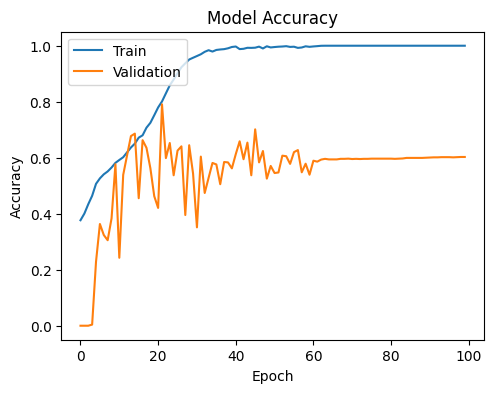

In [34]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [35]:
model.build()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 32, 32, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 16, 16, 128)       0         
 ng2D)                                                

In [36]:
# Code showing the accmodel_loaded.evaluate(x_train, y_train)
model_loaded = tf.keras.models.load_model('best_model.tf')

In [37]:
model_loaded.evaluate(x_train, y_train)


469/469 [==============================] - 6s 13ms/step - loss: 0.4113 - accuracy: 0.8381


[0.411327064037323, 0.8381333351135254]

In [38]:
model_loaded.predict(x_train)[10000]

469/469 [==============================] - 5s 11ms/step


array([0.06665863, 0.1350895 , 0.79825187], dtype=float32)

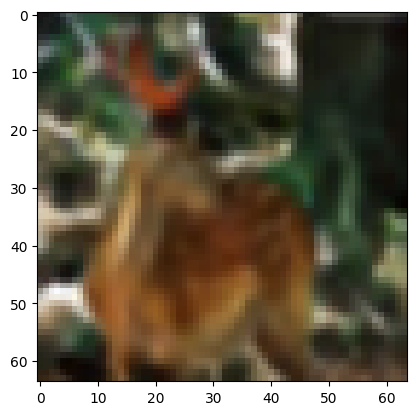

In [39]:
plt.imshow(x_train[10000])

In [40]:
y_train[10000]

2

# Object Detection

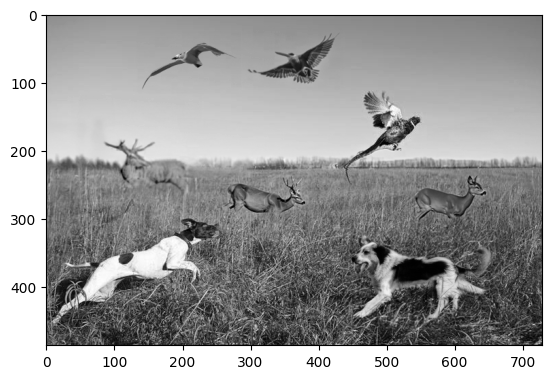

In [41]:
#load imaage as grey scale
img = cv2.imread('dog_bird_deer.jpg')

#convert bgr to rgb
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


#show image
plt.imshow(gray, cmap='gray')

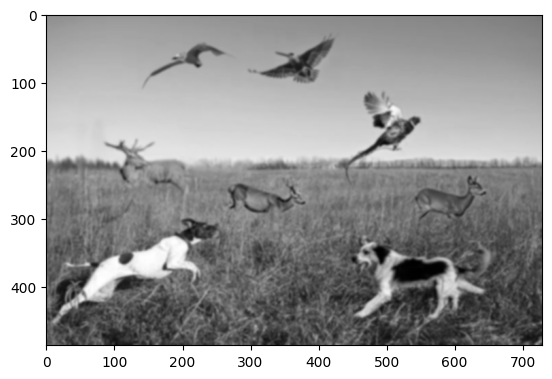

In [42]:
#apply gaussian blur
img_blur = cv2.GaussianBlur(gray, (7,7), 0)
#show image
plt.imshow(img_blur, cmap='gray')

1771.47


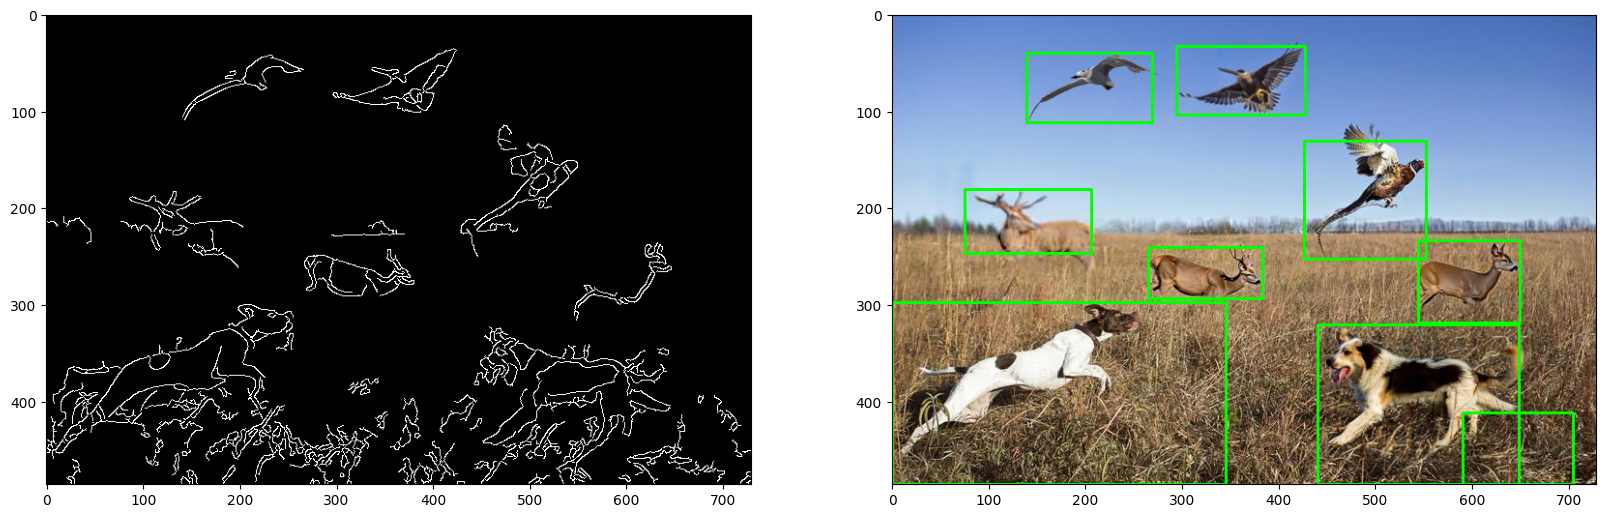

In [43]:
# Apply Canny edge detection
canny_edges = cv2.Canny(img_blur, 55, 200)

# Increase the kernel size for dilating the edges to close gaps in contours
kernel = np.ones((5, 5), np.uint8)
dilated_edges = cv2.dilate(canny_edges, kernel, iterations=1)

# Find contours
contours, _ = cv2.findContours(dilated_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


min_area_threshold = 0.005 * img.shape[0] * img.shape[1]
print(min_area_threshold)

# Draw bounding boxes based on the area threshold
for c in contours:
    if cv2.contourArea(c) > min_area_threshold:
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(canny_edges, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow( img)
plt.show()

# Classification of Detected Objects

1/1 [==============================] - 0s 252ms/step
Image 1: [0.35270175 0.6327673  0.01453095]
Image 2: [0.00356597 0.11083519 0.8855988 ]
Image 3: [0.07748044 0.9155806  0.00693893]
Image 4: [0.02674656 0.12320792 0.8500455 ]
Image 5: [0.02141842 0.7564713  0.22211032]
Image 6: [0.35272127 0.1609414  0.4863374 ]
Image 7: [0.7820346  0.05139435 0.16657111]
Image 8: [0.00861966 0.30142024 0.6899601 ]
Image 9: [0.186213   0.0381394  0.77564764]
[1 2 1 2 1 2 0 2 2]


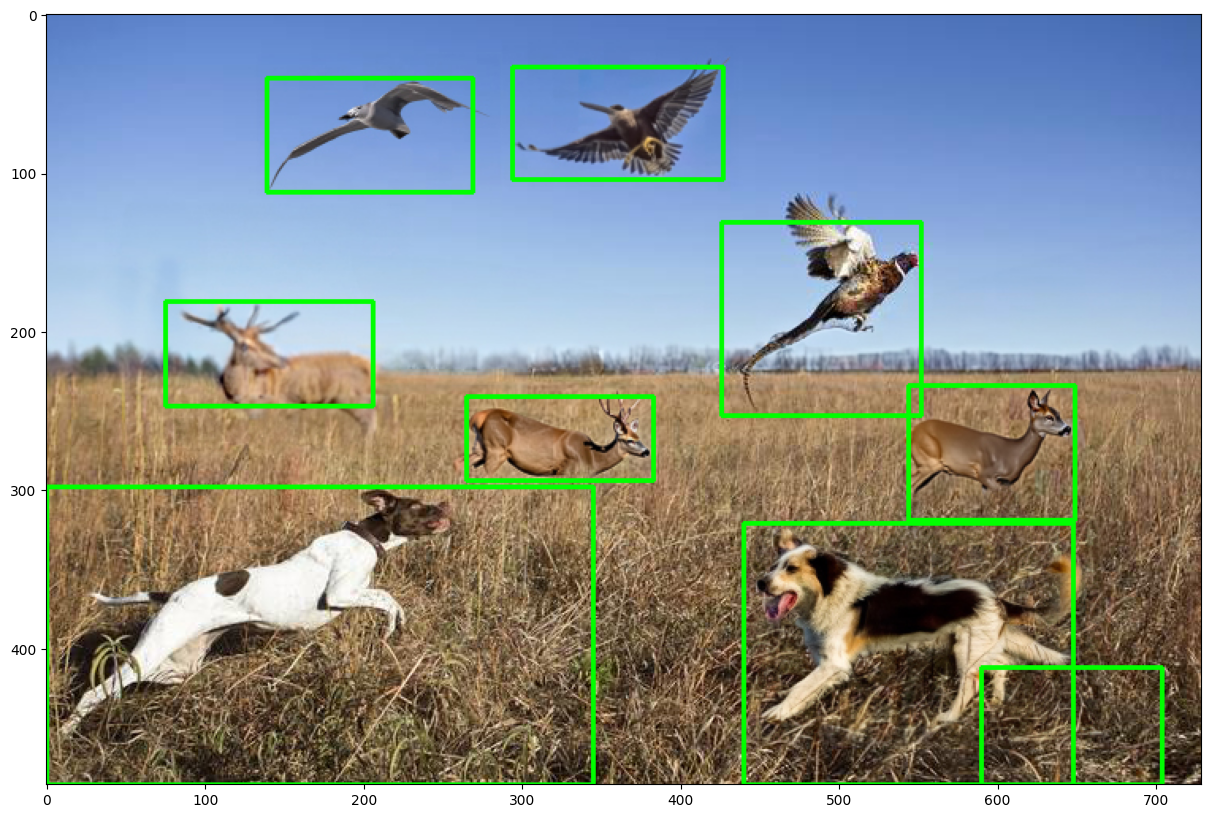

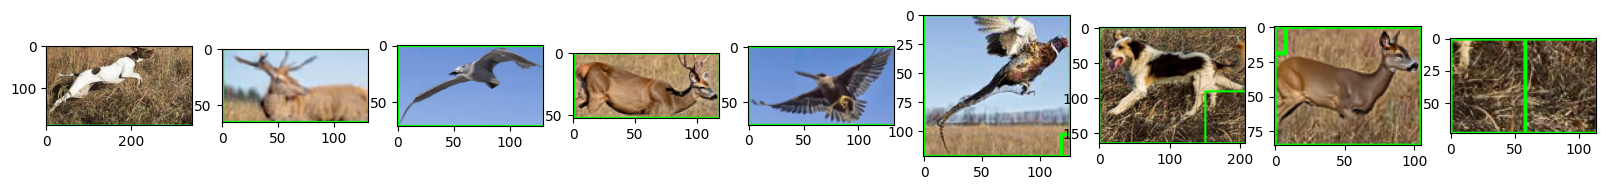

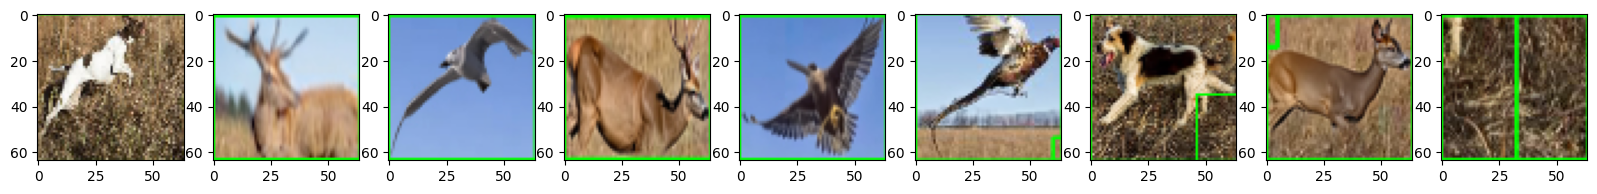

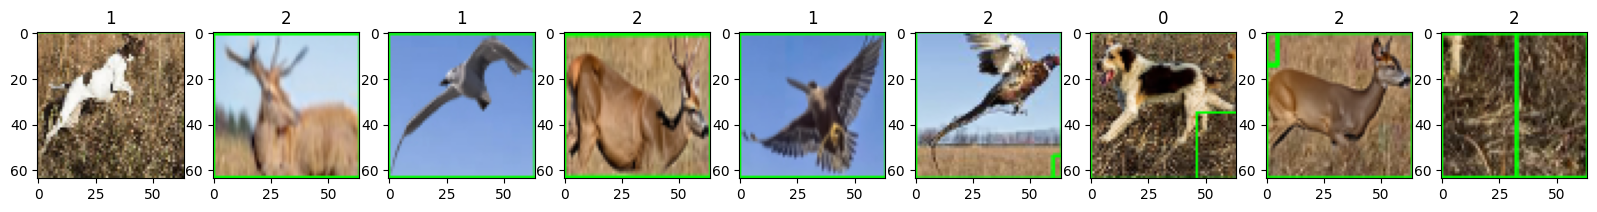

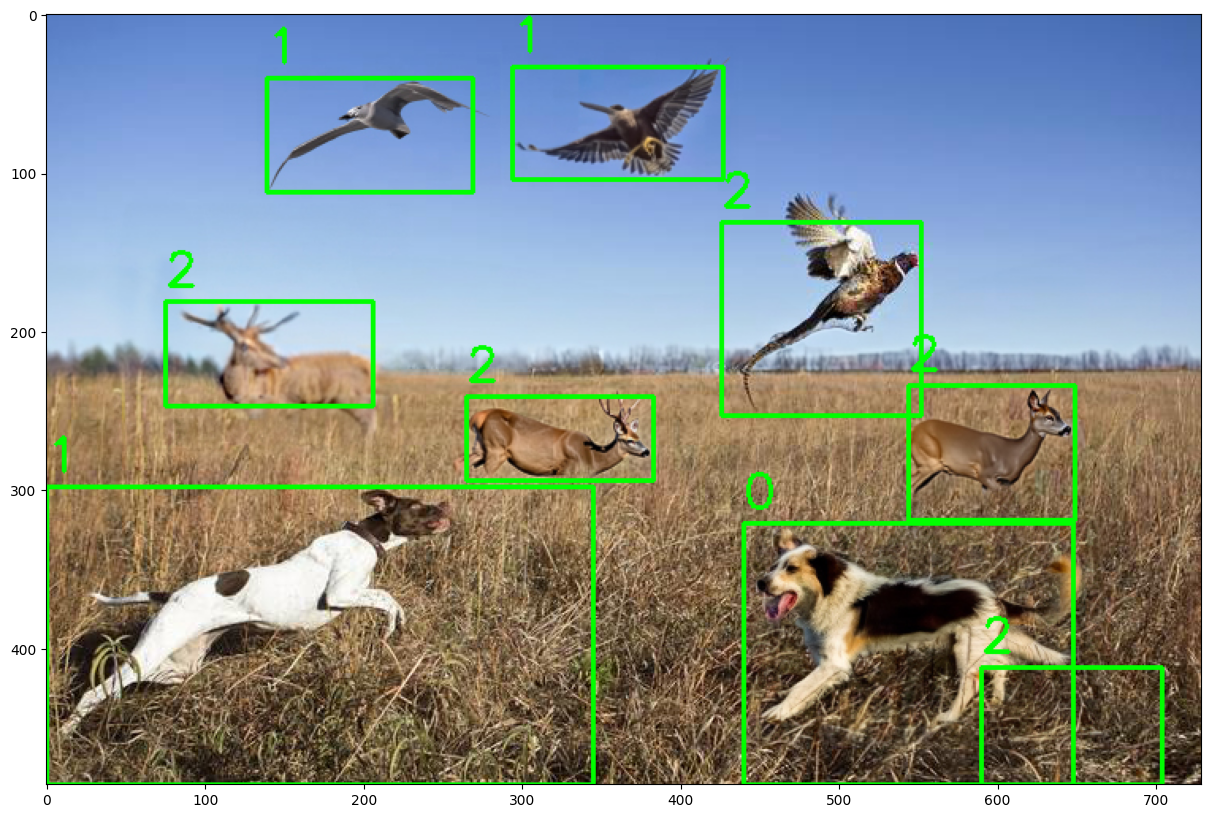

In [44]:
#make all the bounding boxes 64x64 so we can feed them into our model for prediction

#store the bounding boxes in a list
bounding_boxes = []

for c in contours:
    if cv2.contourArea(c) > min_area_threshold:
        x, y, w, h = cv2.boundingRect(c)
        bounding_boxes.append((x, y, w, h))
        
#sort the bounding boxes by their x coordinate
bounding_boxes.sort(key=lambda x: x[0])

#show the bounding boxes
for box in bounding_boxes:
    x, y, w, h = box
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plt.figure(figsize=(20, 10))
plt.imshow(img)

#crop all the images inside the boxes as 64x64 images
cropped_images = []

for box in bounding_boxes:
    x, y, w, h = box
    cropped = img[y:y+h, x:x+w]
    cropped_images.append(cropped)
    
#show the cropped images
plt.figure(figsize=(20, 10))
for i in range(len(cropped_images)):
    plt.subplot(1, len(cropped_images), i + 1)
    plt.imshow(cropped_images[i])
    
#resize the images to 64x64
resized_images = []

for image in cropped_images:
    resized = cv2.resize(image, (64, 64))
    resized_images.append(resized)
    
#show the resized images
plt.figure(figsize=(20, 10))
for i in range(len(resized_images)):
    plt.subplot(1, len(resized_images), i + 1)
    plt.imshow(resized_images[i])
    
#convert the images to numpy arrays
resized_images = np.array(resized_images)

#normalize the images
resized_images = resized_images.astype('float32') / 255.0

#make predictions on the images
predictions = model_loaded.predict(resized_images)

#show the predictions
for i in range(len(predictions)):
    print(f"Image {i + 1}: {predictions[i]}")
    

# label the images
labels = np.argmax(predictions, axis=1)
print(labels)

#show the images with their labels
plt.figure(figsize=(20, 10))
for i in range(len(resized_images)):
    plt.subplot(1, len(resized_images), i + 1)
    plt.title(labels[i])
    plt.imshow(resized_images[i])
    

#show the labels on the original image with bounding boxes
for i in range(len(labels)):
    x, y, w, h = bounding_boxes[i]
    cv2.putText(img, str(labels[i]), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.show()


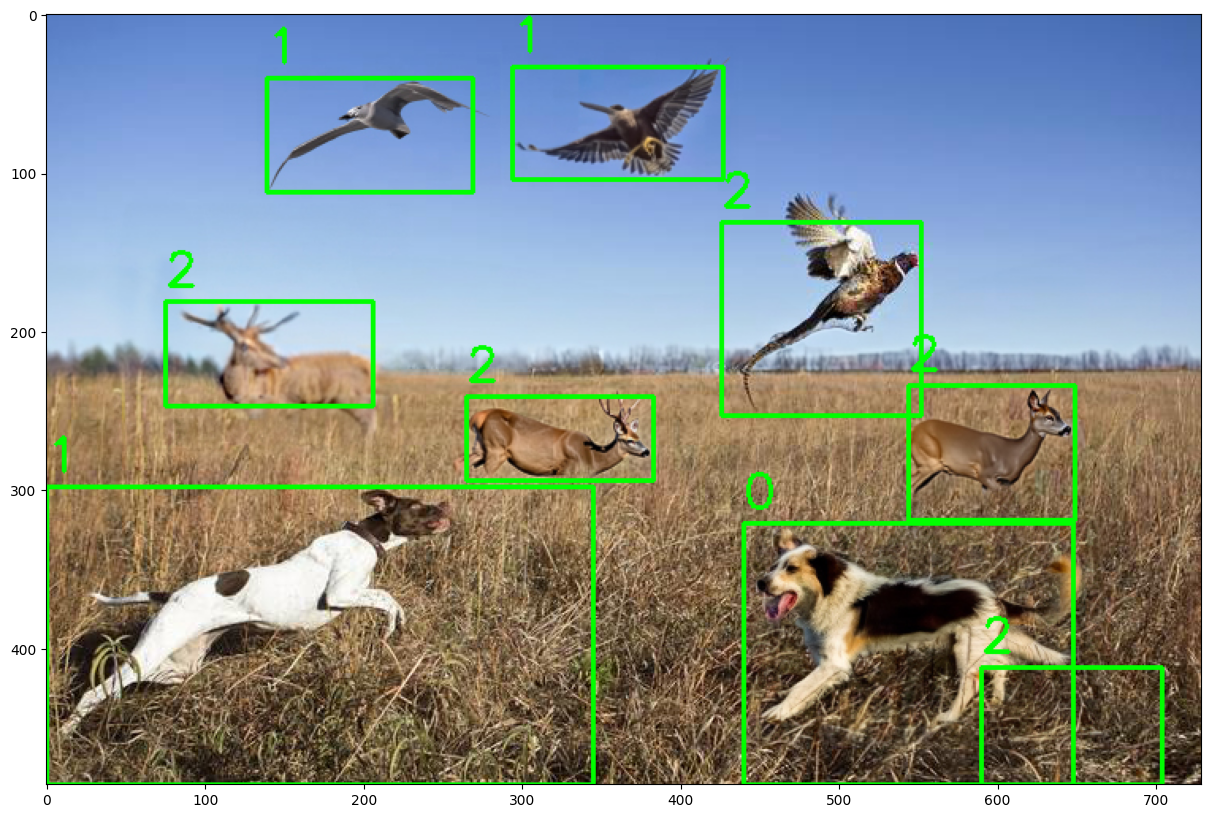

In [45]:
# Render a final image showing the result of your object detector with bounding boxes and labels on the original image.

# Text properties
text = "image label"
position = (50, 50)  # x, y coordinates
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
color = (255, 255, 255)  # White color in BGR
thickness = 2

# Put the text on the image
# cv2.putText(image, text, position, font, font_scale, color, thickness)

final_image = img.copy()

for i in range(len(labels)):
    x, y, w, h = bounding_boxes[i]
    cv2.putText(final_image, str(labels[i]), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.rectangle(final_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plt.figure(figsize=(20, 10))
plt.imshow(final_image)
plt.show()

